# Performing Regression using Machine Learning Techniques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [3]:
house_data = pd.read_csv("../datasets/kc_house_data.csv")
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# Dropping columns which are not needed

house_data.drop(["id", "lat", "long", "zipcode"], inplace=True, axis=1)

In [5]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  sqft_living15  21613 non-null  int64  
 16  sqft_lot15     21613 non-null  int64  
dtypes: float64(3), int64(13), object(1)
memory usage: 

In [6]:
# Converting contents of date column to date time format

house_data['date'] = pd.to_datetime(house_data["date"])
house_data["house_age"] = house_data['date'].dt.year - house_data['yr_built']

house_data.drop(['date', 'yr_built'], inplace=True, axis=1)
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15,house_age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,0,1340,5650,59
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1991,1690,7639,63
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,0,2720,8062,82
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,0,1360,5000,49
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,0,1800,7503,28


In [7]:
house_data['renovated'] = house_data['yr_renovated'].apply(lambda x:0 if x == 0 else 1)
house_data.drop('yr_renovated', inplace=True, axis=1)

In [8]:
house_data.to_csv("../datasets/house_data_processed.csv", index=False)

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


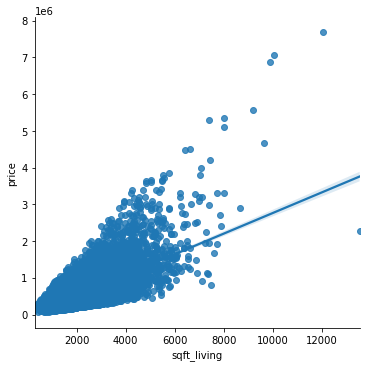

In [9]:
sns.lmplot('sqft_living', 'price', house_data)

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


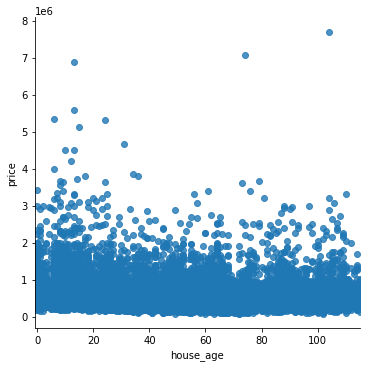

In [10]:
sns.lmplot('house_age', 'price', house_data)

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


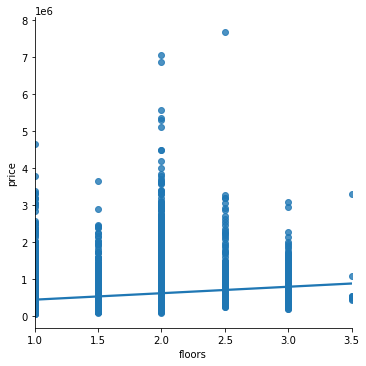

In [11]:
sns.lmplot('floors', 'price', house_data)

In [12]:
X = house_data[['sqft_living']]
y = house_data['price']

In [13]:
X.head()

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680


In [14]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

In [17]:
X_test = scaler.transform(X_test)

In [18]:
# Performing Linear Regression

linear_regression = LinearRegression()

model = linear_regression.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [19]:
df = pd.DataFrame({"test": y_test, "predicted": y_pred})
df.sample(10)

,test,predicted
17744,635000.0,1.118590e+06
18160,262500.0,3.880984e+05
14964,730000.0,4.776606e+05
13323,715000.0,5.616251e+05
8458,340000.0,2.397611e+05
9433,272000.0,2.929386e+05
10382,808000.0,6.707790e+05
10497,410000.0,4.580688e+05
20718,480000.0,4.020925e+05
14610,309000.0,5.840156e+05


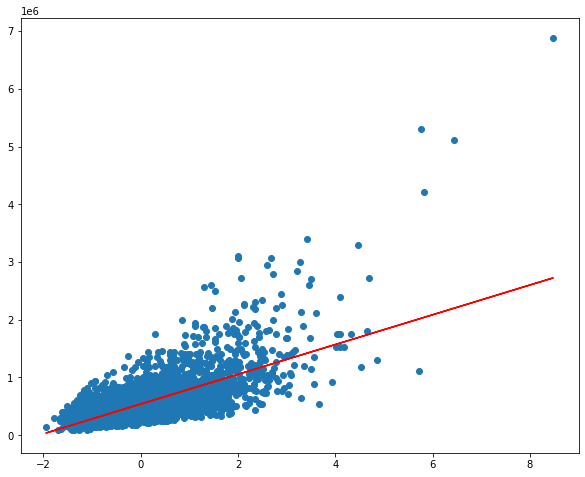

In [20]:
plt.figure(figsize=(10, 8))

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c="r")

In [21]:
print("Training Score: ", linear_regression.score(X_train, y_train))

Training Score:  0.4936388930932043


In [22]:
print("Testing score: ", r2_score(y_test, y_pred))

Testing score:  0.48967816602838377


In [23]:
theta_0 =  linear_regression.coef_
intercept = linear_regression.intercept_
print(f"Slope: {theta_0}, Intercept: {intercept}")

Slope: [257812.06413298], Intercept: 539932.8799305958


# Performing Regression statistically using statsmodel package

In [24]:
import statsmodels.api as sm

In [25]:
X_train = sm.add_constant(X_train)

In [26]:
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                 1.685e+04
Date:                Sun, 10 Jan 2021   Prob (F-statistic):               0.00
Time:                        19:08:25   Log-Likelihood:            -2.4019e+05
No. Observations:               17290   AIC:                         4.804e+05
Df Residuals:                   17288   BIC:                         4.804e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.399e+05   1985.895    271.884      0.0